# **Cinema Through Time: How Seasons and History Shape the Movies We Watch**

Our analysis explores the relationship between cinema, major historical events, and seasonal trends, examining how genres, themes, and revenues in movies evolve in response to societal shifts and audience preferences. Through this project, we aim to reveal how cinema evolves as a cultural medium, responding dynamically to both historical events and seasonal influences. By mapping patterns over time, we hope to contribute to a deeper understanding of how films resonate with audiences during different historical and cultural contexts, highlighting cinema’s role as both a reflection and an influencer of society.

### **Objectives**
- **General Information About Movies**:
   - Gather and analyze basic details about movies, including release dates, genres, revenue, and popularity. This foundational understanding will provide context for deeper analyses and trends.
- **Historical Influence on Film Genres and Themes**: 
   - Analyze the impact of major historical events, such as world wars and economic crises, on film genres and themes.
   - Examine how cinema reflects societal shifts and concerns, capturing the essence of different eras through the types of stories told.

- **Seasonal Patterns in Movies**:
   - Identify seasonal trends in genre popularity, aligning with cultural events and holidays.
   - Explore how certain genres, like horror or family movies, may resonate more with audiences during specific times of the year.
   - Assess the role of timing in maximizing box office performance, considering how release seasons affect audience engagement.

- **Sentiment Analysis of Plot Summaries**:
   - Capture the emotional tone of movies by analyzing the sentiment in plot summaries.
   - Track variations in sentiment across seasons and historical periods, examining how cinema reflects the emotional climate of its time.


### **Datasets**

We are utilizing two primary datasets in this project: the *CMU* dataset and the *TMDB Movies Dataset* from Kaggle. The *CMU* dataset serves as our foundational source, providing detailed information on genres, release dates, and thematic elements, which are essential for analyzing the relationship between movies, historical events, and seasonal patterns. 

To complement the *CMU * dataset, we incorporated the *TMDB Movies Dataset*, a comprehensive movie database that includes additional features such as ratings, revenue, and popularity scores. Integrating this dataset adds depth to our analysis, especially by enriching financial insights and addressing missing values within the *CMU s* dataset. This combined approach allows us to leverage the strengths of both datasets, ensuring a more robust and accurate exploration of cinema’s evolution over time.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from src.data.data_loader import *
from src.utils.EDA import *
from src.utils.historical_events import *

In [2]:
movies_df = data_loader_movies()
print("Movie Metadata Sample:")
movies_df.info()

Movie Metadata Sample:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81628 entries, 0 to 81627
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   wikipedia_id  81628 non-null  int64  
 1   freebase_id   81628 non-null  object 
 2   name          81628 non-null  object 
 3   languages     72754 non-null  object 
 4   countries     75822 non-null  object 
 5   budget        8290 non-null   float64
 6   popularity    49929 non-null  float64
 7   revenue       11032 non-null  float64
 8   runtime       67952 non-null  float64
 9   genres        81628 non-null  object 
 10  release_date  74850 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 6.9+ MB


In [3]:
print("\nSummary Statistics for Numeric Columns:")
movies_df.describe().T


Summary Statistics for Numeric Columns:


,count,mean,std,min,25%,50%,75%,max
wikipedia_id,81628.0,1.739927e+07,1.098763e+07,330.00,7317442.250,1.775422e+07,2.713261e+07,3.750192e+07
budget,8290.0,1.855514e+07,3.040164e+07,1.00,1250750.000,6.850000e+06,2.200000e+07,3.790000e+08
popularity,49929.0,4.915950e+00,7.775740e+00,0.00,1.067,2.171000e+00,5.572000e+00,3.007380e+02
revenue,11032.0,4.117780e+07,1.056461e+08,1.00,1500000.000,7.241692e+06,3.130311e+07,2.782275e+09
runtime,67952.0,1.095071e+02,4.140910e+03,0.03,80.000,9.300000e+01,1.080000e+02,1.079281e+06


### Handling Missing Values
The first step in our data cleaning process is to identify any missing values and decide on the appropriate strategy for handling them. Missing values can affect our analysis and models, so we will either fill them in with suitable values or remove the affected rows if necessary.


In [4]:
print("\nMissing Values in Each Column:")
print(movies_df.isnull().sum())


Missing Values in Each Column:
wikipedia_id        0
freebase_id         0
name                0
languages        8874
countries        5806
budget          73338
popularity      31699
revenue         70596
runtime         13676
genres              0
release_date     6778
dtype: int64


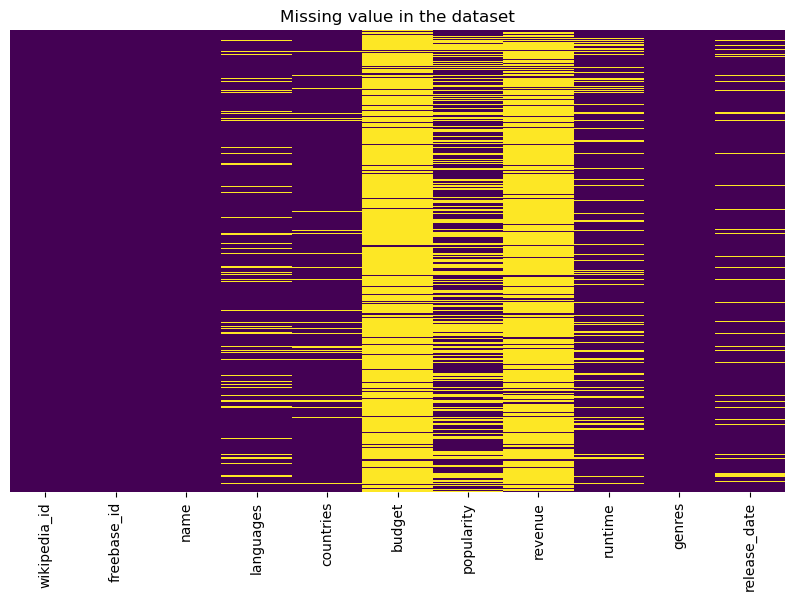

In [5]:
plot_missing_values(movies_df)

In [6]:
movies_df = feature_engineering_movies(movies_df)
number_categories(movies_df)

Number of genres: 21
['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Experimental', 'Family', 'Fantasy', 'Historical', 'Horror', 'Musical', 'Mystery', 'Other', 'Romance', 'Science Fiction', 'Superhero', 'Thriller', 'War', 'Western']


### **General Information About our Dataset**

Features in our cleaned dataset:

*   **wikipedia_id** - A unique identifier for the movie's Wikipedia page
*   **freebase_id** - A unique identifier used by Freebase
*   **name** - The title of the movie
*   **languages** - A list of languages spoken in the movie
*   **countries** - The list of countries where the movie was produced or released
*   **budget** - The total production cost of the movie
*   **popularity** -  A numeric value indicating the movie's popularity from TMDB website
*   **revenue** - The total amount of money the movie earned from all sources
*   **runtime** - The total length of the movie in minutes
*   **genre** - The categories or types of the movie
*   **release_date** - The official date when the movie was released





 From which country do most movies come from?

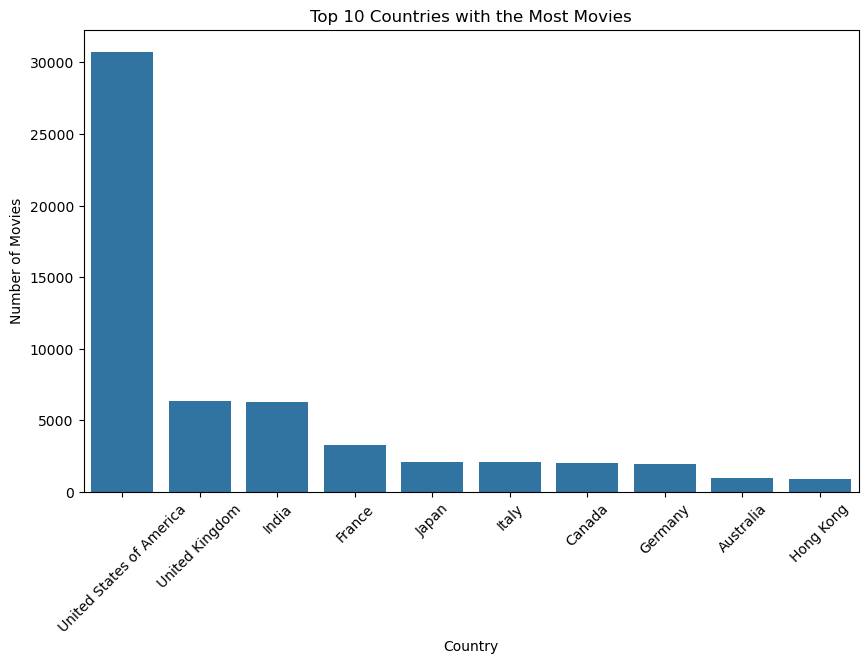

In [7]:
plot_top_10_countries(movies_df)

Let's also visualize most popular languages

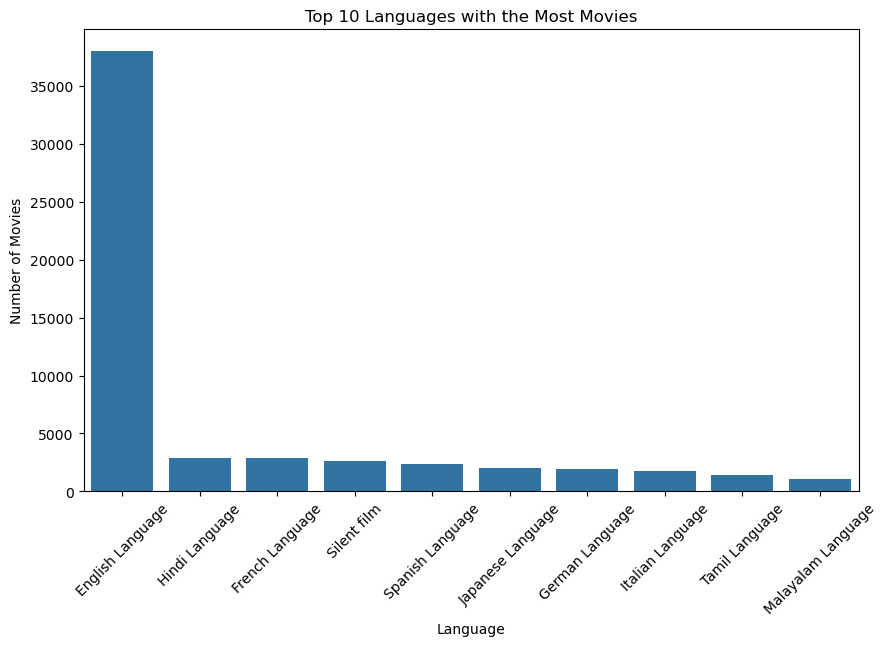

In [8]:
plot_popular_languages(movies_df)

 We can also check the budgets of movies in our dataset

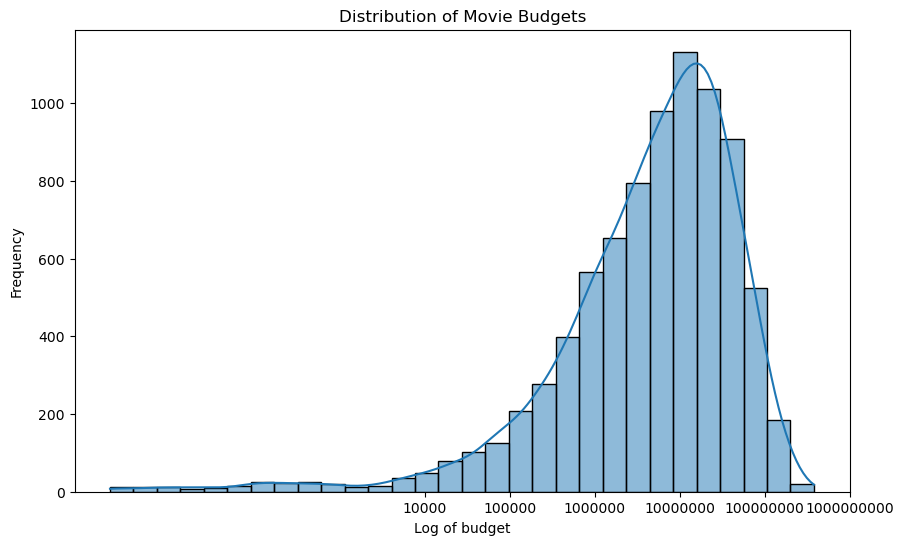

In [9]:
plot_log_scale_budget_distribution(movies_df)

 It is also very useful to know distribution of revenues

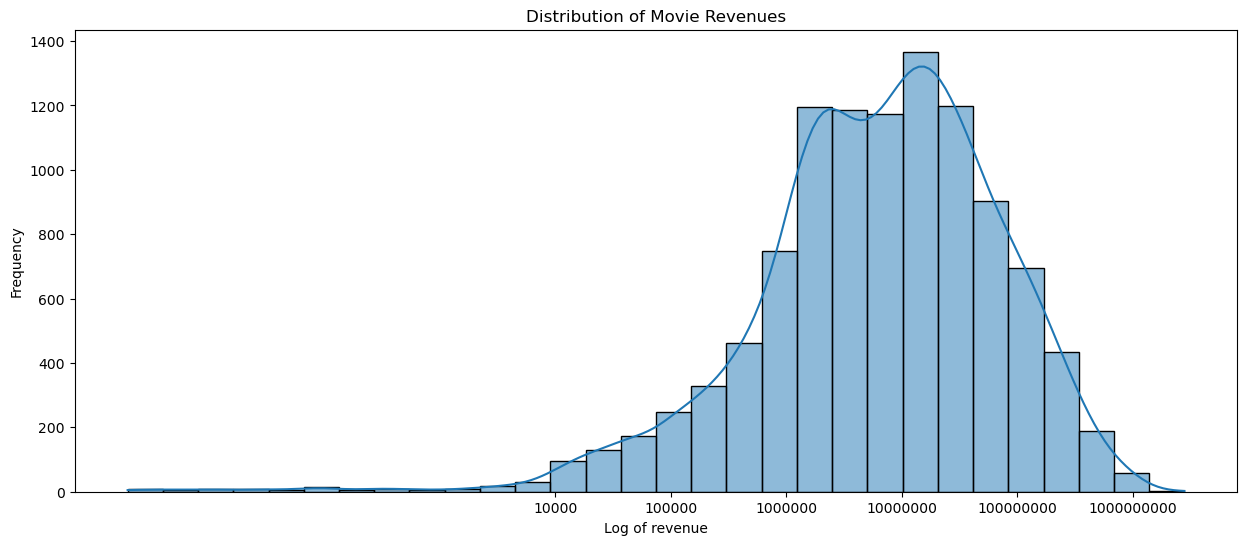

In [10]:
plot_revenue_distribution(movies_df)

 Distribution of movies through years

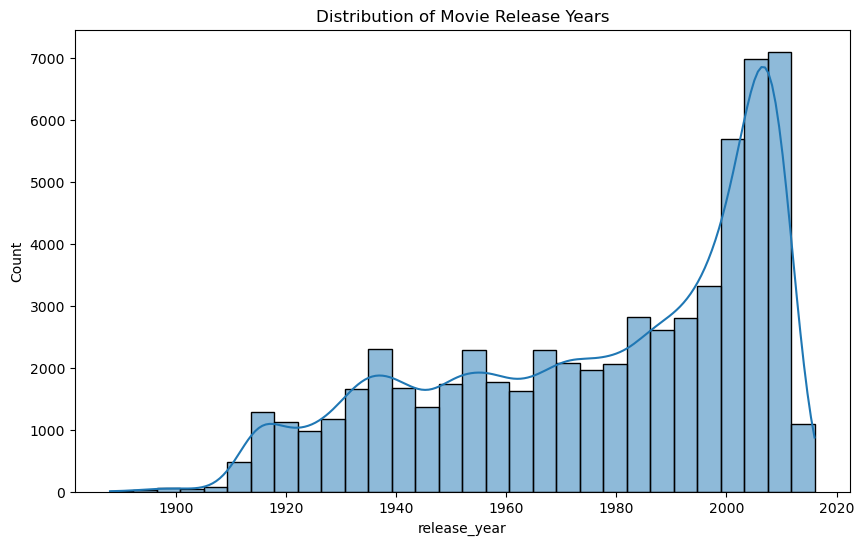

In [11]:
plot_movies_over_years(movies_df)

Let's see what are the most popular genres

10 Most Popular Genres:
Drama: 27374
Comedy: 14504
Action: 8497
Thriller: 7603
Other: 6074
Horror: 4157
Adventure: 4131
Family: 4074
Documentary: 3833
Musical: 3363


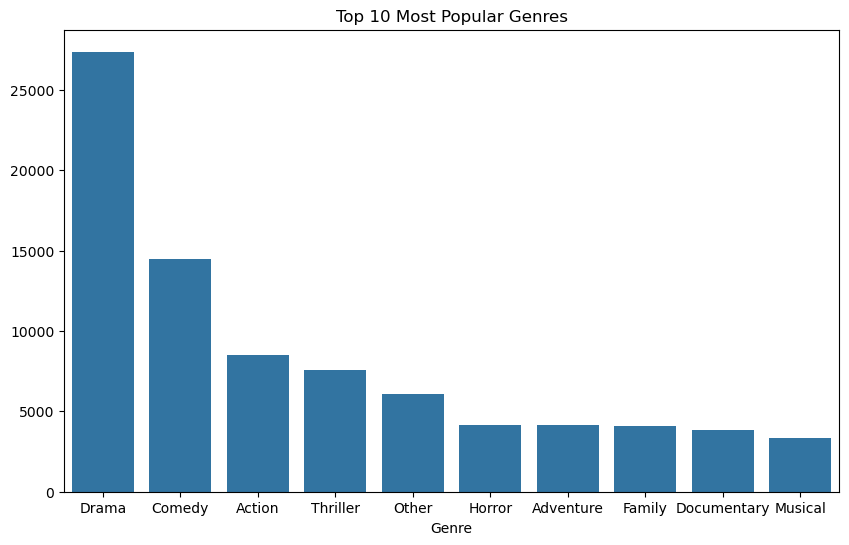

In [12]:
plot_top_10_genres(movies_df)

popularity score is also useful, so we should show it

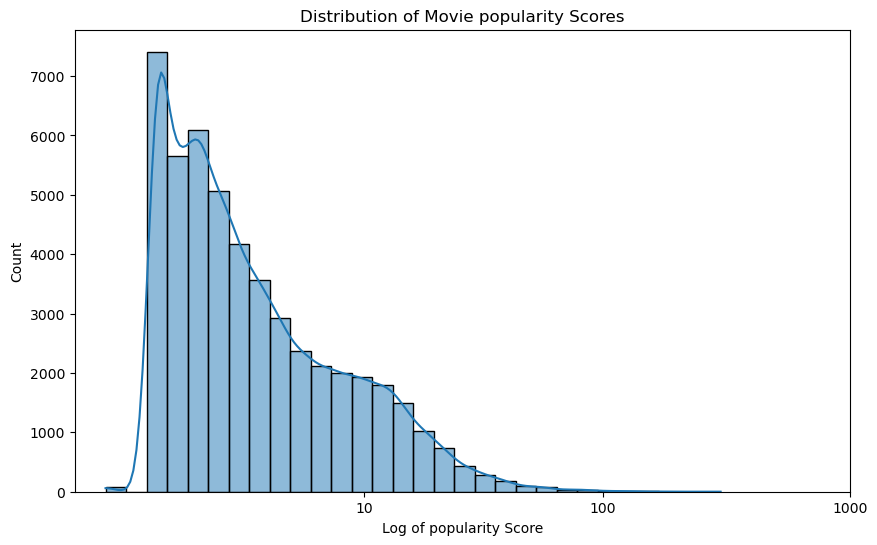

In [13]:
plot_popularity(movies_df)

### **Historical Influence on Film Genres and Themes**

#### Identifying periods in history that can have an effect in genres

For this part in our work, we try and find out if there exists a relationship between important historic periods and the genre of movies, starting off with World War I and World War II


We first plotted the amount of movies per genre in 3 different periods, WW1, WW2 and the period between wars

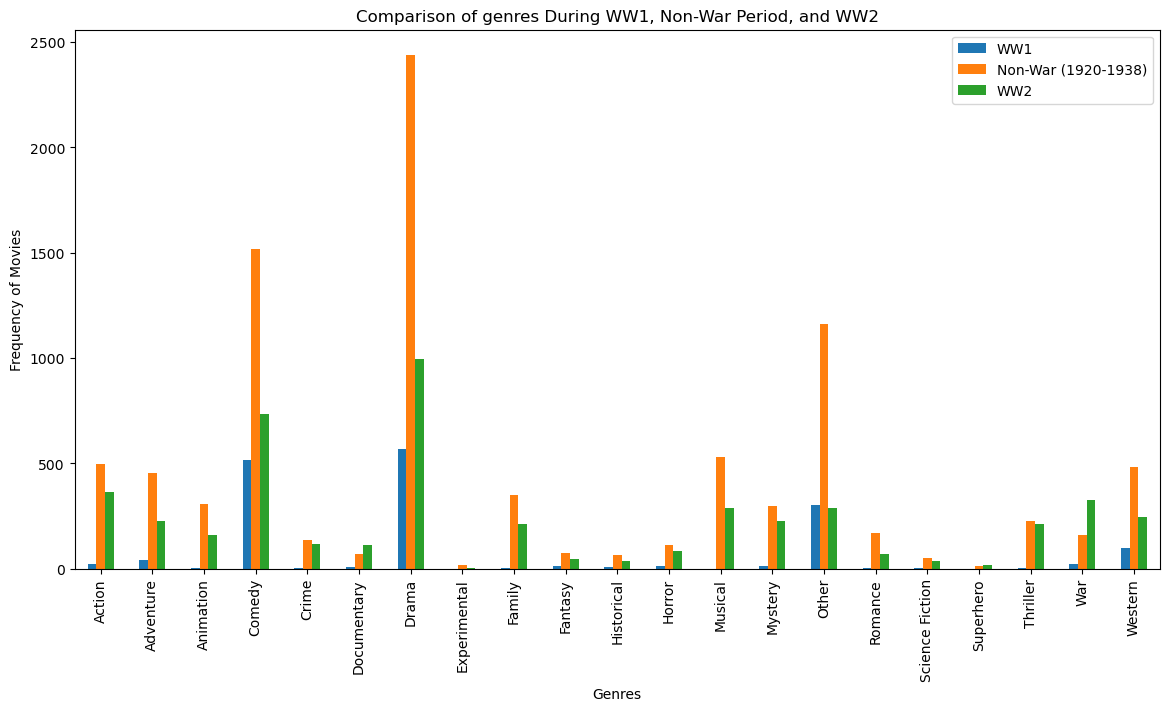

In [14]:
comparison_genres_war_periods(movies_df)

To have a better understanding of the flux of each movie genre in the different periods, we plotted its relative percentage to all the genres.

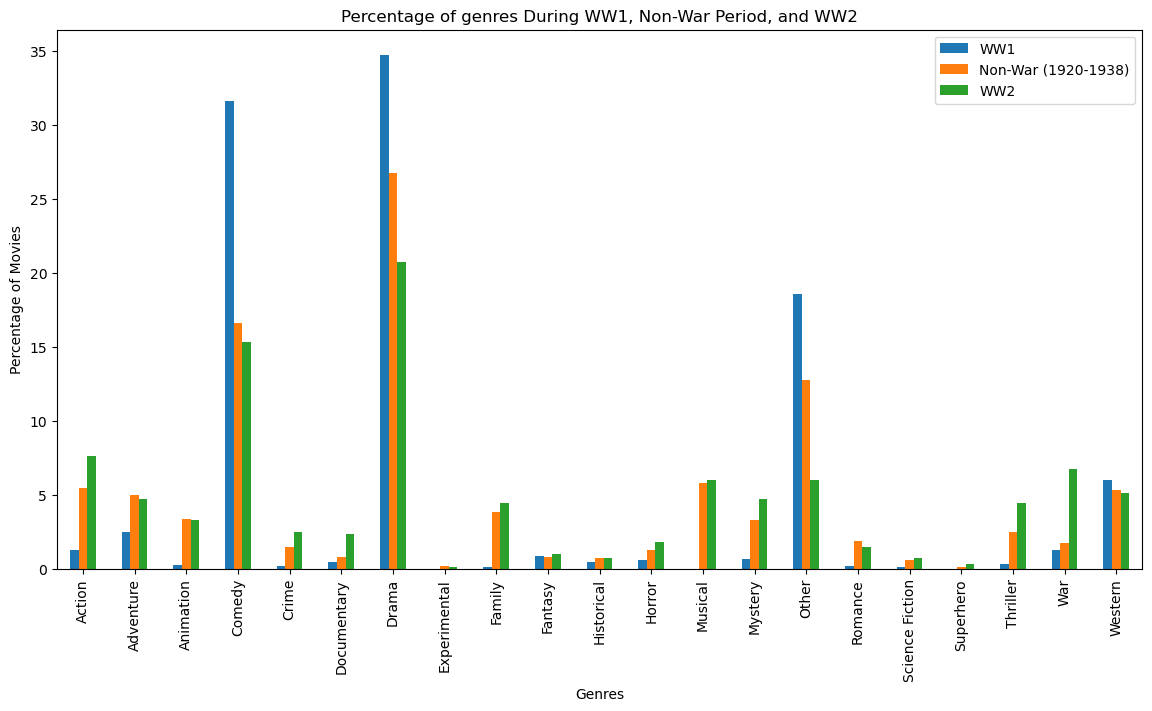

In [15]:
percentage_genres_war_periods(movies_df)

Because of a possible bias in the period of Non-War, we also plotted with respect to all the movies of our dataset.

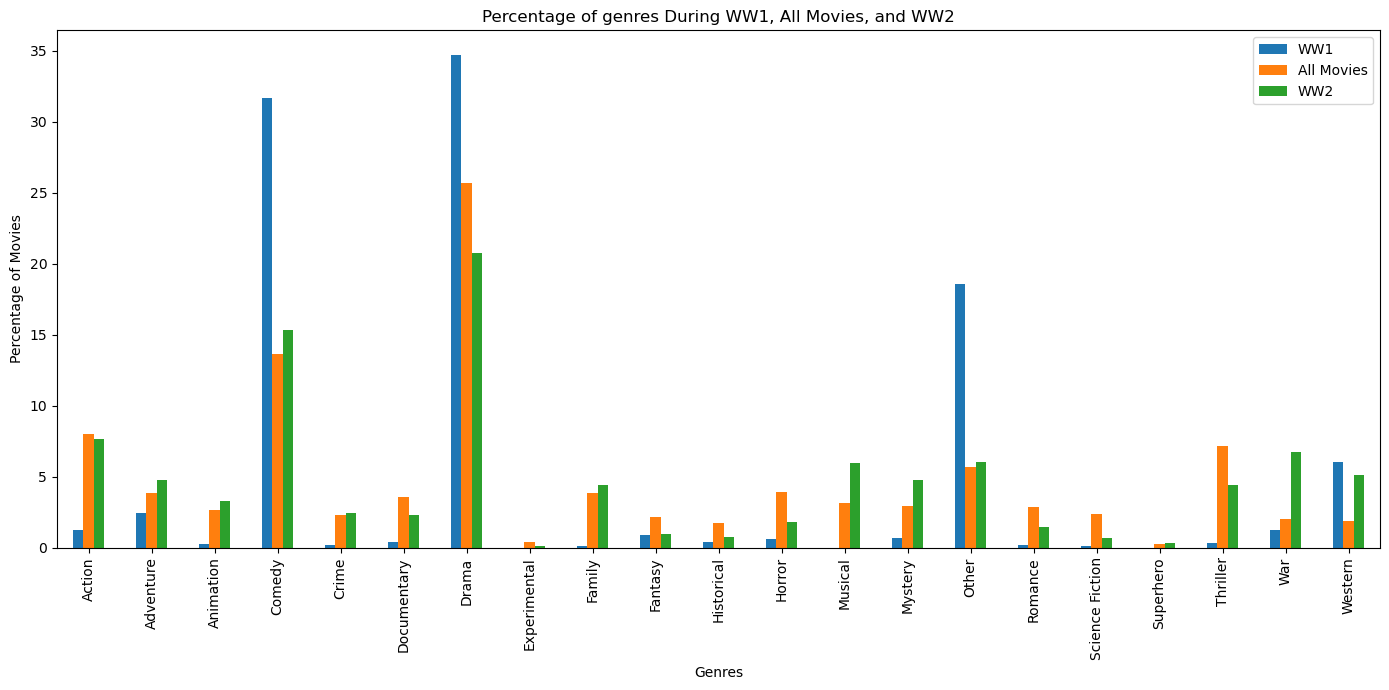

In [16]:
percentage_genres_war_periods_all_movies(movies_df)

We now proceeded to make a similar analysis but instead of using bars to plot the different genres, we plotted all of them over eachother in a plot with an x axis representing the years and the y axis the relative percentage of each movie genre.

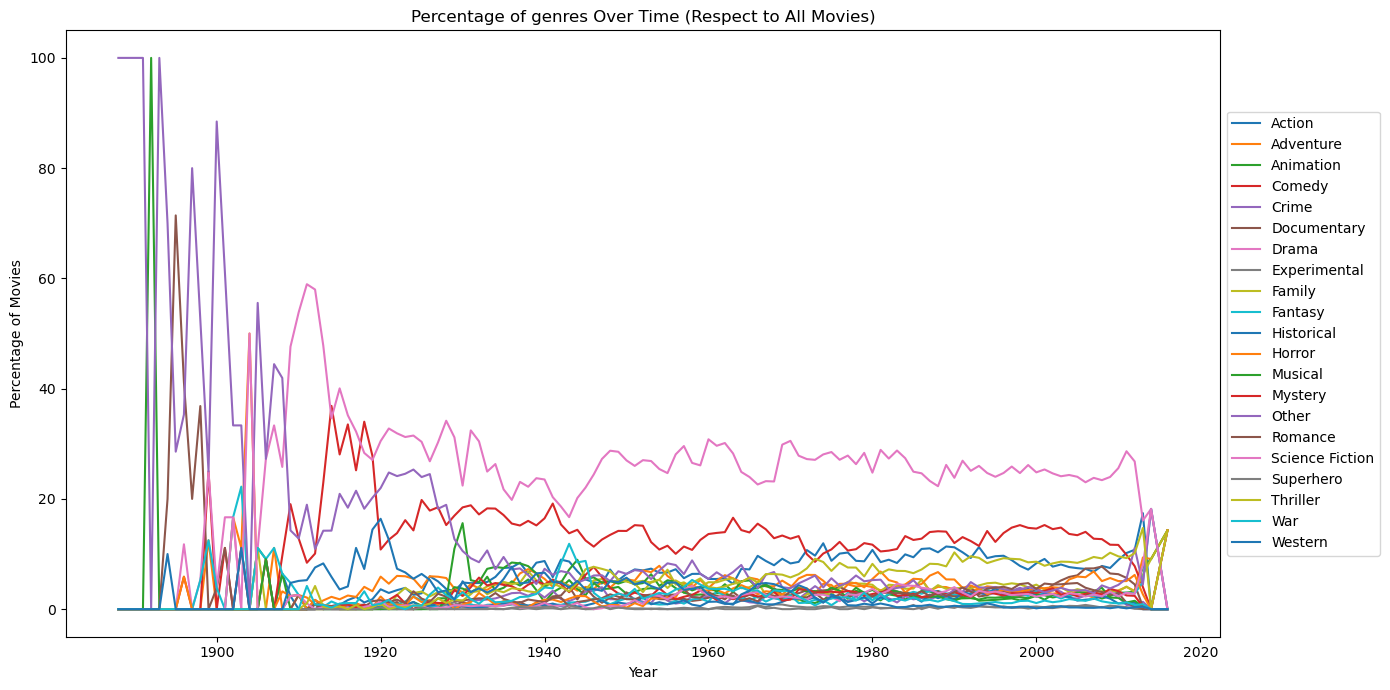

In [17]:
genres_over_time(movies_df)

From the plots we generated we could see there is some noise in the first years of our data set, and because of it it will be difficult to observe a trend or a pattern in WW1 for example. To further prove this point we will go into a deeper analysis.

First we wanted to know the number of movies per year, especially for the older dates.

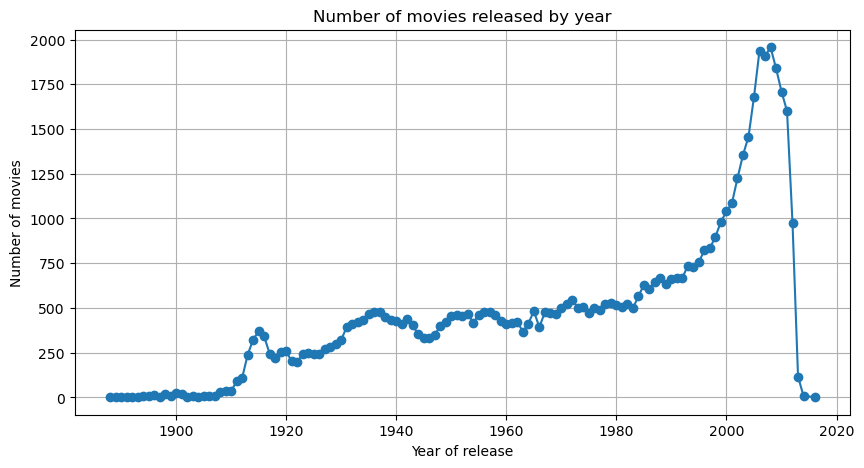

In [18]:
number_movies(movies_df)

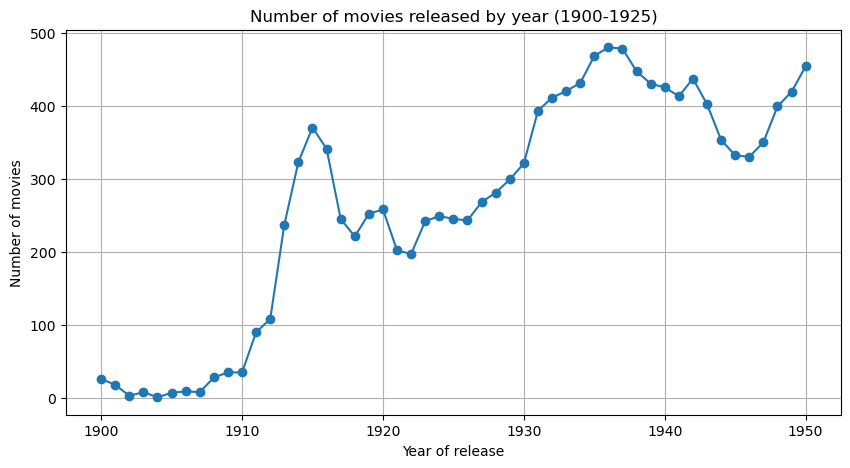

In [19]:
number_movies_1900_1925(movies_df)

In [20]:
number_movies_war(movies_df)

Number of movies from 1914 to 1919: 1500
Number of movies from 1939 to 1945: 2792


We can see that the amount of movies in our data set for the second world war is aproximately double the amount for the first world war. And with this information we decided to focus on WW2 instead of both.

<Figure size 1400x700 with 0 Axes>

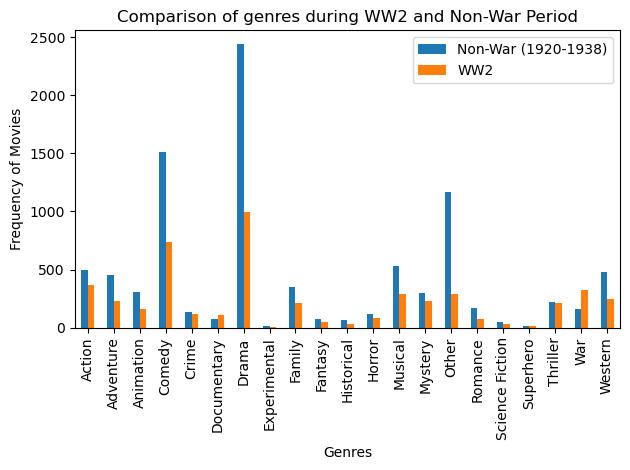

<Figure size 1400x700 with 0 Axes>

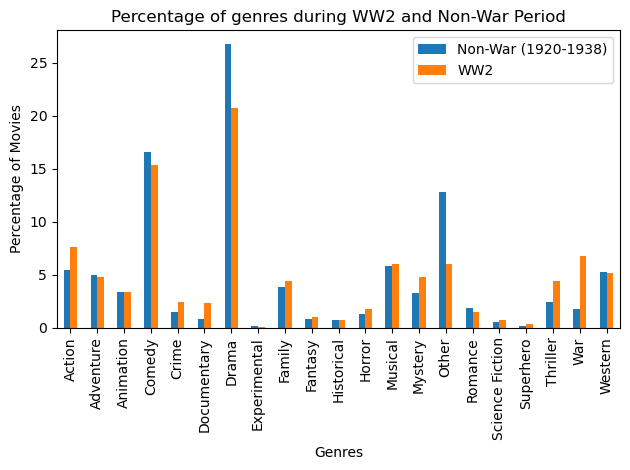

<Figure size 1400x700 with 0 Axes>

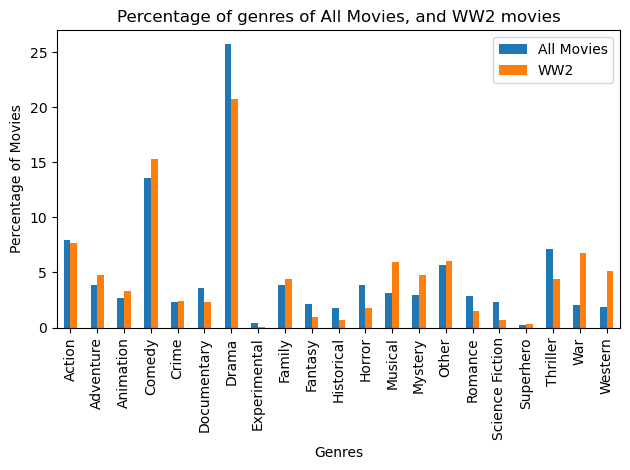

In [21]:
genre_comparison_war_period(movies_df)

From the bar plot we could see were interested to dive deeper in the genres of: War, Crime, Action, Mystery and Documentary.

We left the period for WW1 marked to prove that we couldn't prove anything because of the lack of information.

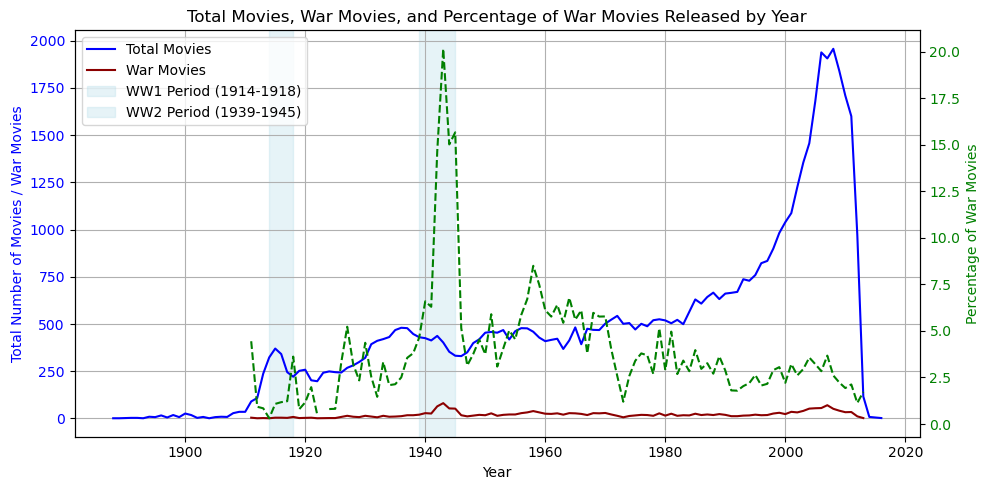

In [22]:
war_movies_timeline(movies_df)

In [23]:
war_movies_info(movies_df)

Percentage of War Movies in the Entire Dataset: 3.57%
Percentage of War Movies During WW1 (1914-1918): 1.33%
Percentage of War Movies During WW2 (1939-1945): 11.60%
Percentage of War Movies During Non-War Period (1920-1938): 2.51%


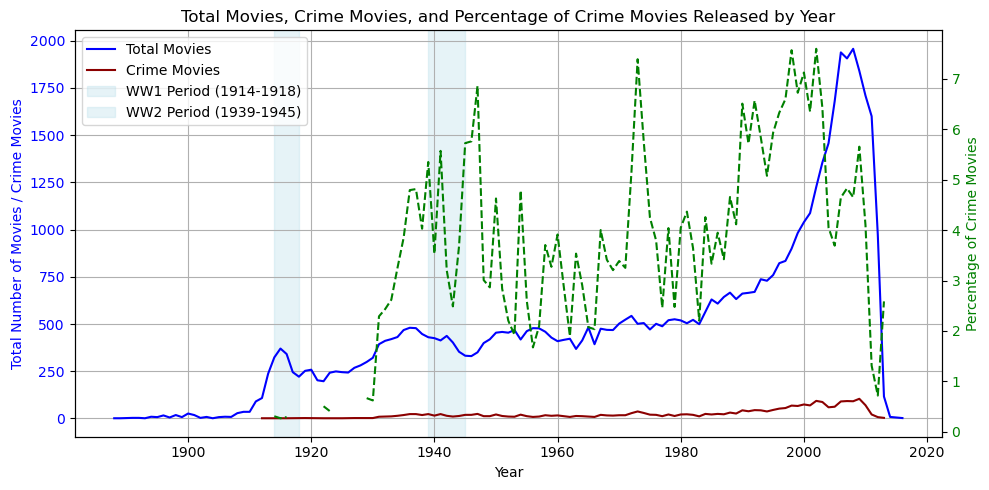

In [24]:
crime_movies_timeline(movies_df)

In [25]:
crime_movies_info(movies_df)

Percentage of Crime Movies in the Entire Dataset: 4.03%
Percentage of Crime Movies During WW1 (1914-1918): 0.20%
Percentage of Crime Movies During WW2 (1939-1945): 4.19%
Percentage of Crime Movies During Non-War Period (1920-1938): 2.13%


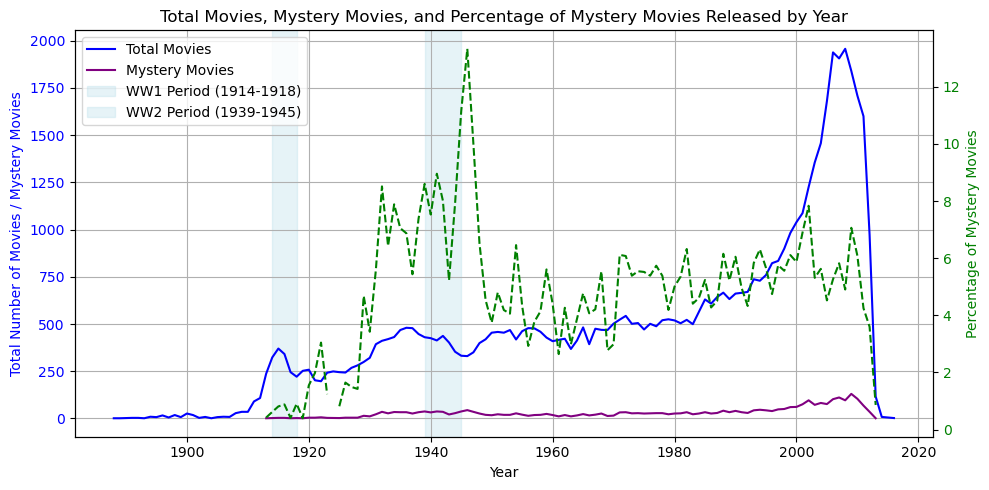

In [26]:
mystery_movies_timeline(movies_df)

In [27]:
mystery_movies_info(movies_df)

Percentage of Mystery Movies in the Entire Dataset: 5.19%
Percentage of Mystery Movies During WW1 (1914-1918): 0.73%
Percentage of Mystery Movies During WW2 (1939-1945): 8.13%
Percentage of Mystery Movies During Non-War Period (1920-1938): 4.72%


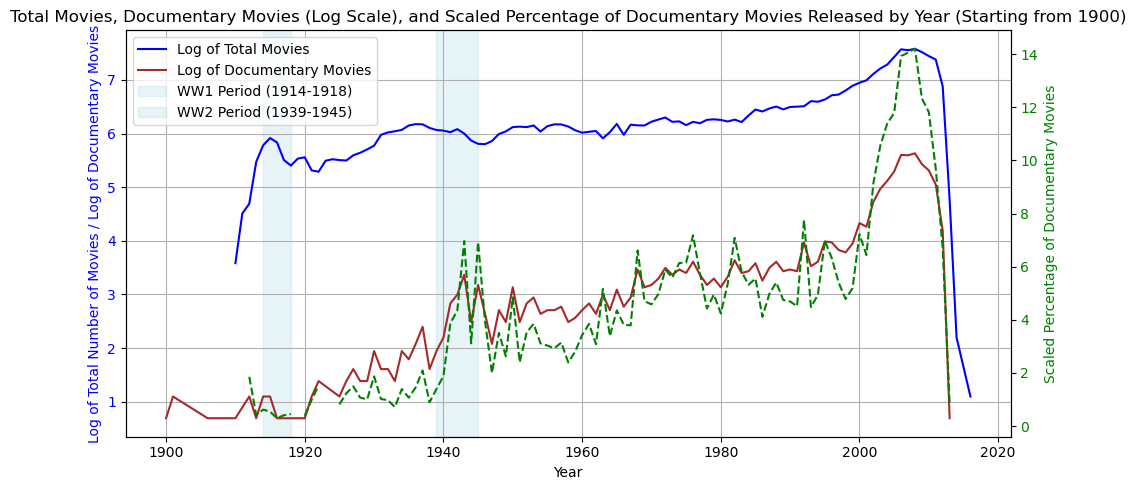

In [28]:
documentary_movies_timeline(movies_df)

For this plot we applied log scaling to emphazise on the brief documentary increase during WW2

In [29]:
documentary_movies_info(movies_df)

Percentage of Documentary Movies in the Entire Dataset: 6.34%
Percentage of Documentary Movies During WW1 (1914-1918): 0.47%
Percentage of Documentary Movies During WW2 (1939-1945): 3.98%
Percentage of Documentary Movies During Non-War Period (1920-1938): 1.11%


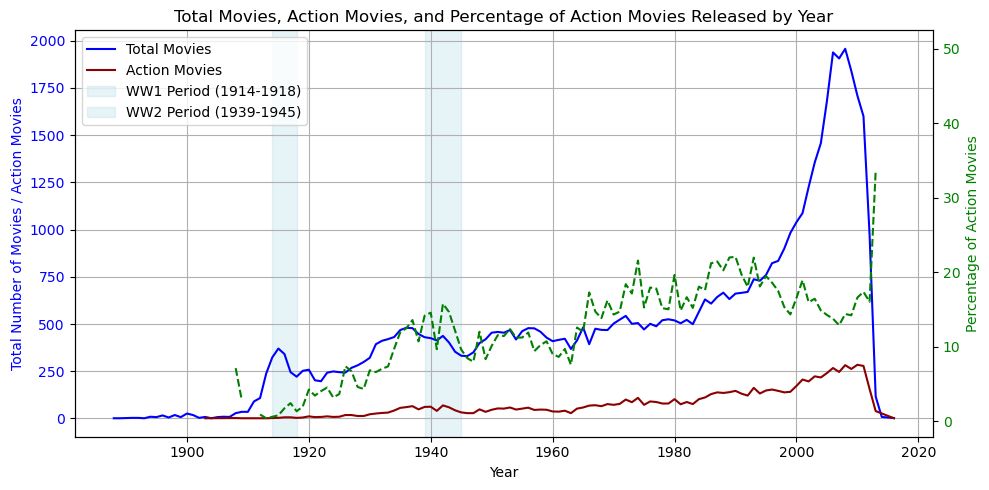

In [30]:
action_movies_timeline(movies_df)

In [31]:
action_movies_info(movies_df)

Percentage of Action Movies in the Entire Dataset: 14.06%
Percentage of Action Movies During WW1 (1914-1918): 1.33%
Percentage of Action Movies During WW2 (1939-1945): 13.11%
Percentage of Action Movies During Non-War Period (1920-1938): 7.82%


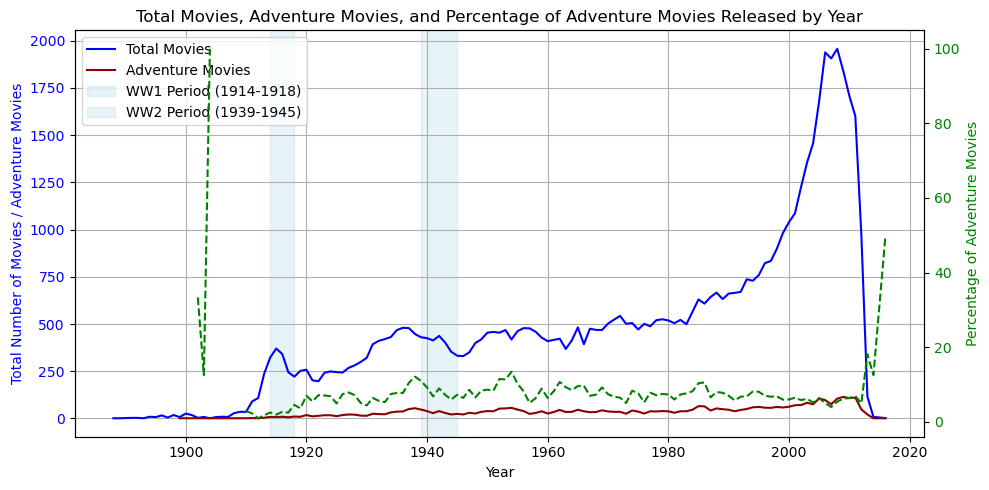

In [32]:
adventure_movies_timeline(movies_df)

In [33]:
adventure_movies_info(movies_df)

Percentage of Adventure Movies in the Entire Dataset: 6.83%
Percentage of Adventure Movies During WW1 (1914-1918): 2.67%
Percentage of Adventure Movies During WW2 (1939-1945): 8.13%
Percentage of Adventure Movies During Non-War Period (1920-1938): 7.20%


To complement our analysis we divided our previous research into countries that were involved in war and weren't.

We also took into account the number of movies for each country and seeing the United States has a considerable amount of advantage, we will be focusing mainly in the United States.

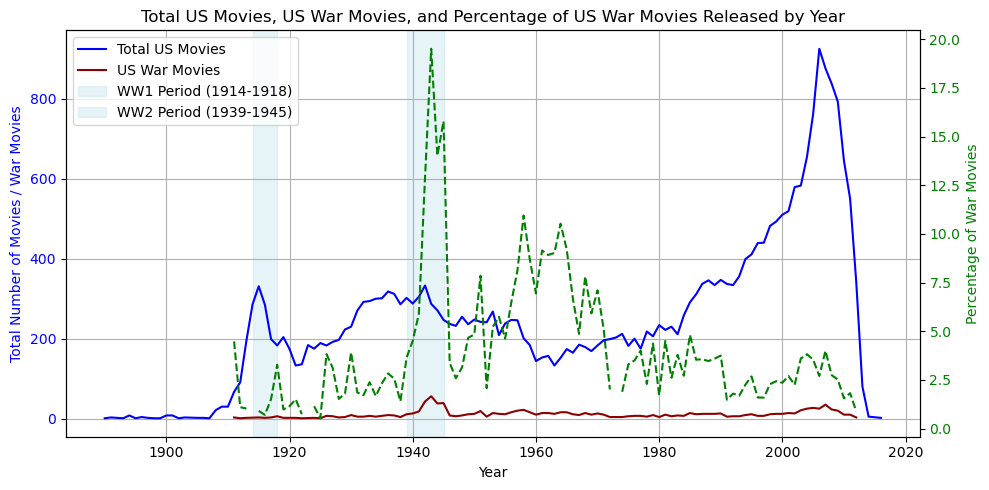

In [34]:
us_movies_war(movies_df)

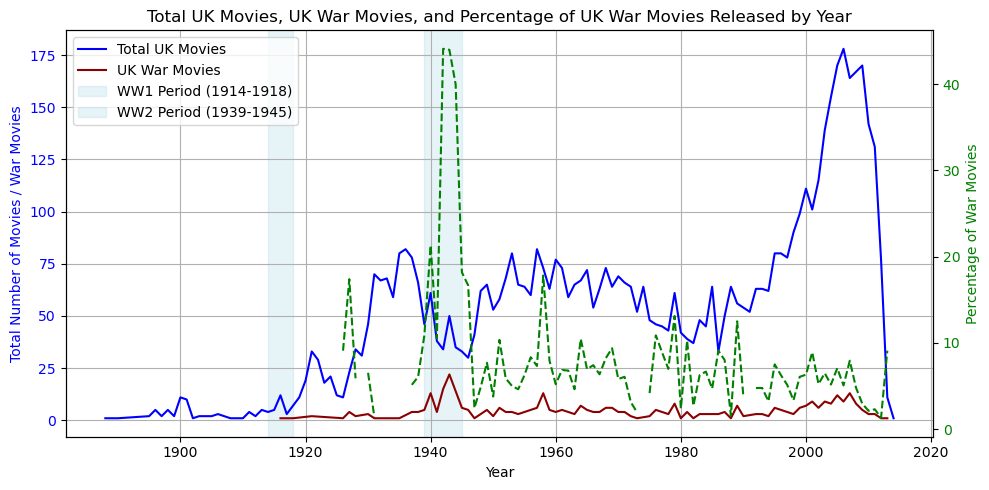

In [35]:
uk_movies_war(movies_df)

Because germany went by different names, we wanted to see if there were more names for germany in our dataset we obtained all the unique names for countries in our dataset and asked chatgpt to list us all the ones that related to germany.

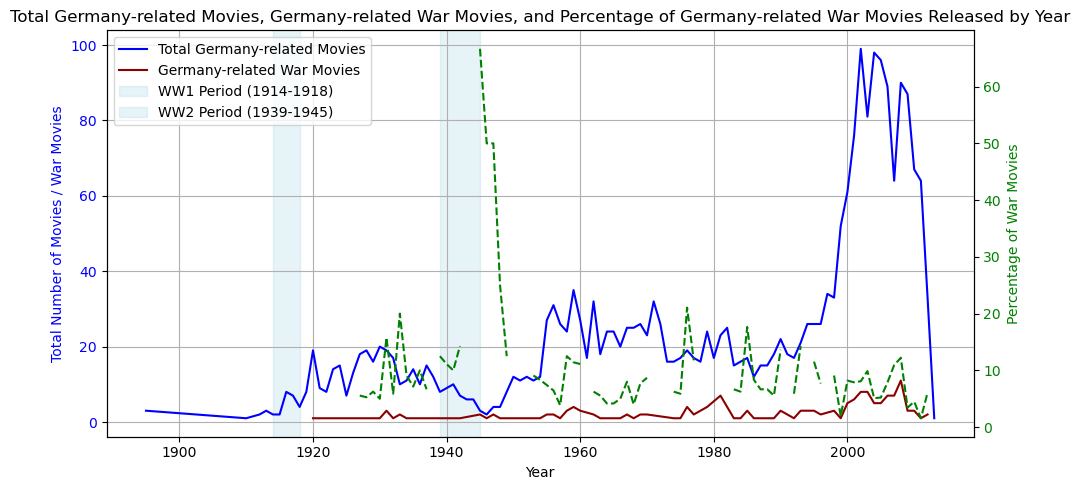

In [36]:
germany_movies_war(movies_df)

We can clearly see that the second world war was the period were war movies had the biggest percentages, and it becomes clearer for countries directly involved in war, but now we will use the example of India who has a large amount of data but wasn't directly involved in the war.

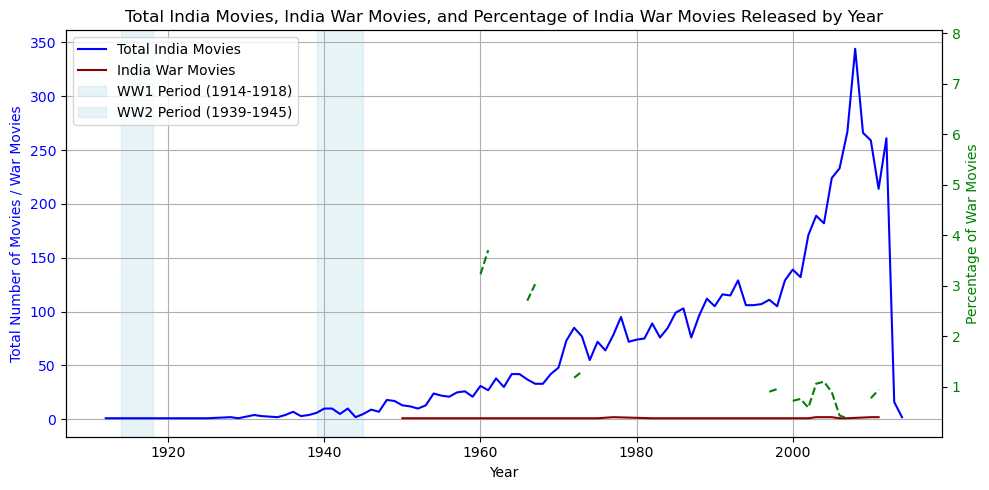

In [37]:
indian_movies_war(movies_df)

Although the number of movies is considerably low, India over the whole dataset has rarely a war movie.

The next event we analyzed is the Space Race during the cold war, especially its influence in Sci-Fi movies  

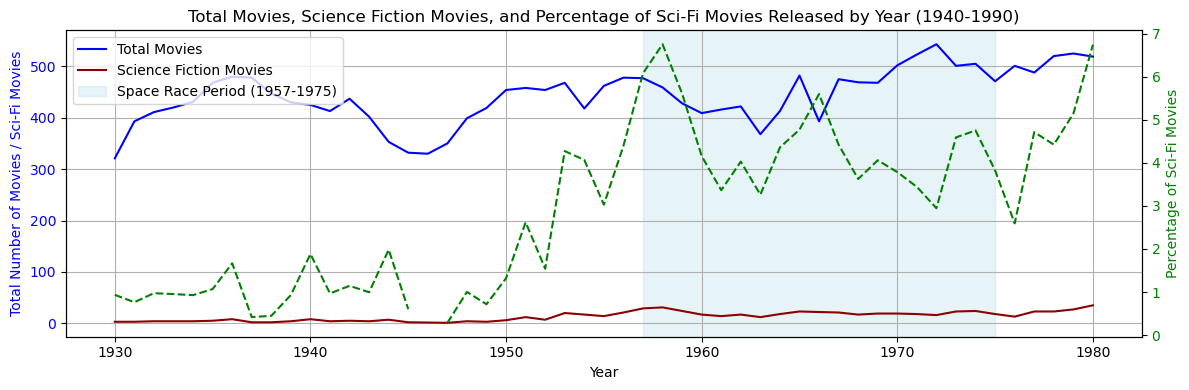

In [38]:
science_fiction_movie(movies_df)

In the plot we can observe, how the percentage of sci-fi movie rises with the start of the Space Race and it maintains the following years.

Because the main participants of this event were United States and the Soviet Union, we also proceeded to analyze it by country to see if it was even clearer.

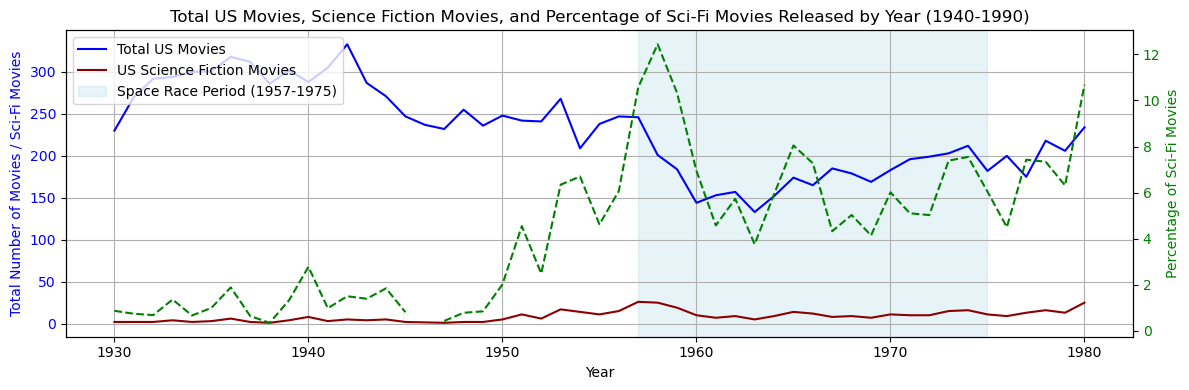

In [39]:
us_scinece_fiction(movies_df)

We did the same as with Germany, we asked chat gpt for all the countries that belonged to the soviet union or names that the SSR could have had, but seeing that there is a very little amount of movies from the SSR in our dataset, we didn't move along with the analysis.

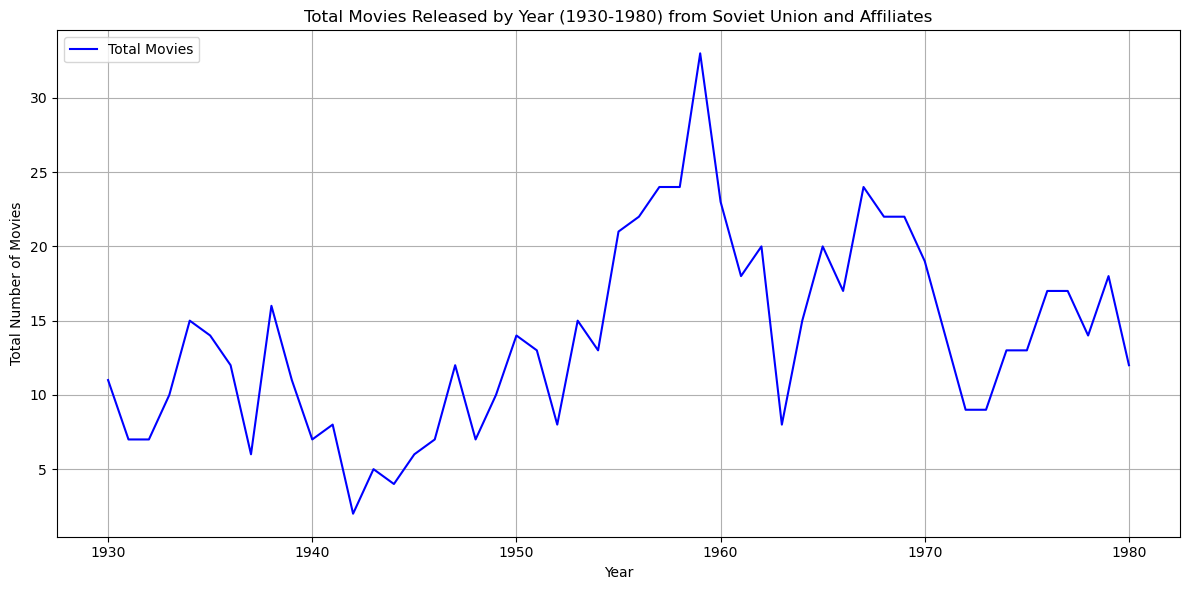

In [40]:
soviet_union_movies_1930_1980(movies_df)

For the next analysis we decided to use 9/11 since we all now movies and documentaries based from the terrorist attack. And we focused mainly on documentaries.

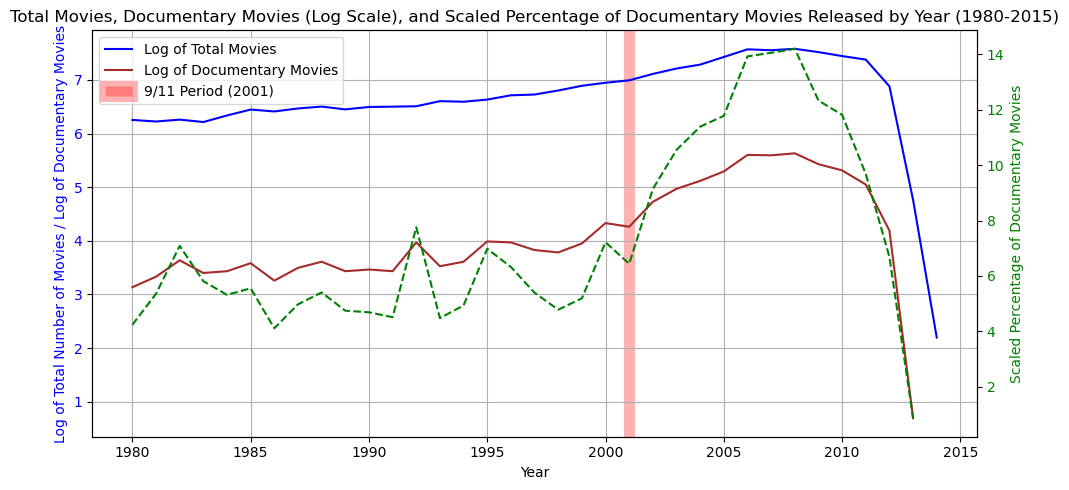

In [41]:
documentary_movies_1980_2015(movies_df)

We can effectively see that after 911, documentaries experienced a very noticeable increase in percentage in both the world and in the United States, we can also see that the plot has the same behaviour but if we see closely the percentage amount in the United States is considerably larger than in the world, it goes up to around 40% where in the world around 28% in its peak.

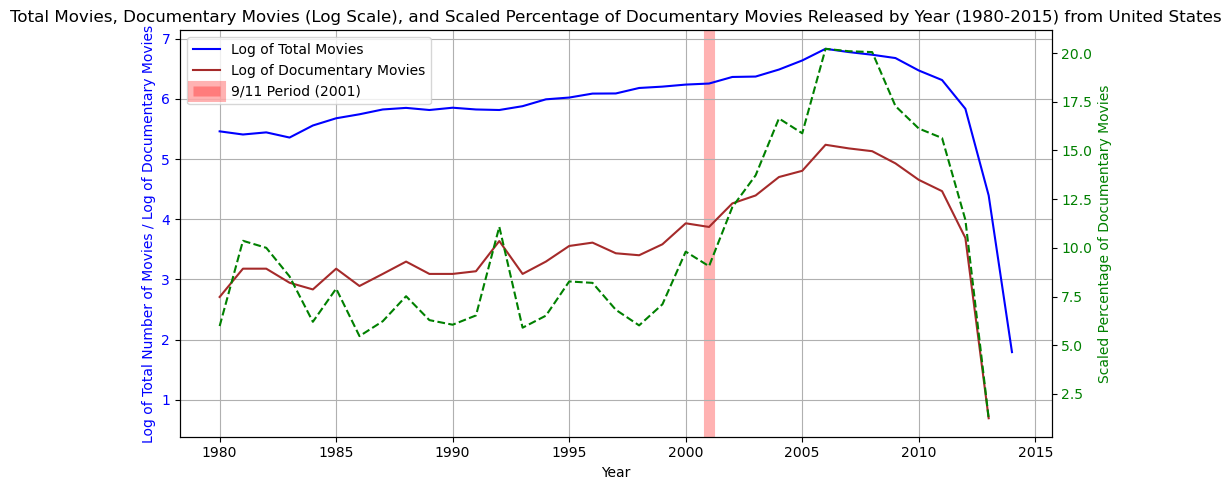

In [42]:
documentary_movies_1980_2015_us(movies_df)

#### Correlation

Correlation between WW2 war movies and war movies over the years

In [43]:
ww2_correlation(movies_df)

Correlation between WWII period and percentage of war movies produced: 0.7024991381584714


Correlation between WW2 war movies and war movies over the years in the United States

In [44]:
ww1_correlation_us(movies_df)

Correlation between WWII period and percentage of War movies produced in the United States: 0.5584222263012544


In [45]:
ww2_correlation_uk(movies_df)

Correlation between WWII period and percentage of War movies produced in the United Kigdom: 0.7311648033056813


In [46]:
ww2_correlation_mystery(movies_df)

Correlation between WWII period and percentage of Mystery movies produced: 0.6140586117894011


In [47]:
ww2_correlation_documentary(movies_df)

Correlation between WWII period and percentage of Documentary movies produced (1910-1960): 0.5005559373827958


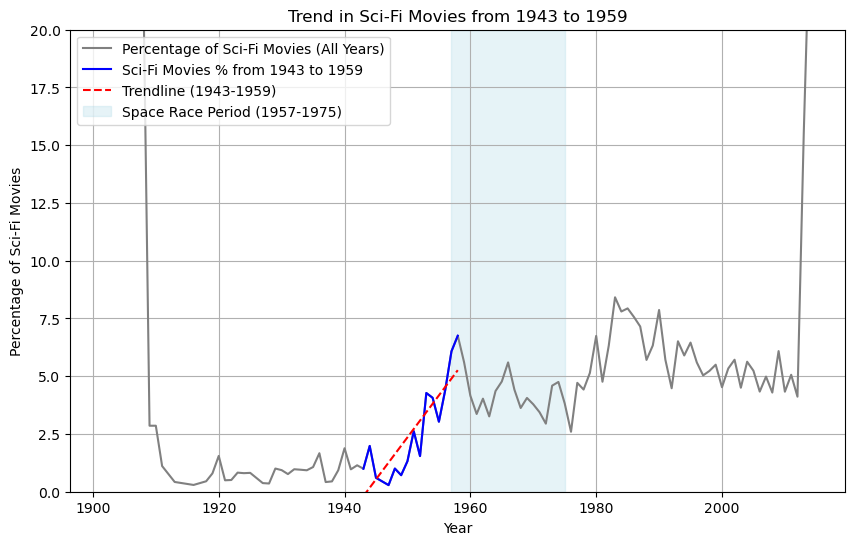

Slope from 1943 to 1959: 0.36339749046068875


In [48]:
sci_fi_1943_1959(movies_df)

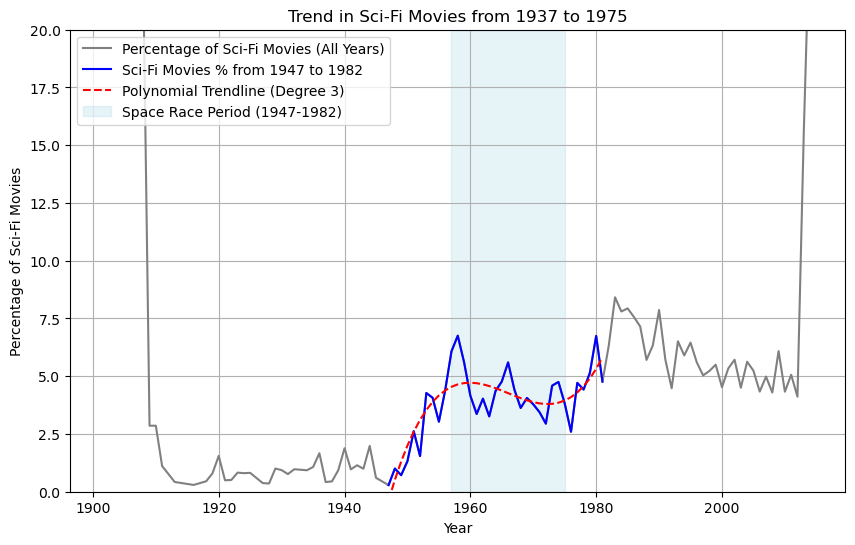

Polynomial Function: f(x) = -7395189.624 + 11284.307*x^1 + -5.740*x^2 + 0.001*x^3


In [49]:
sci_fi_1937_1975(movies_df)

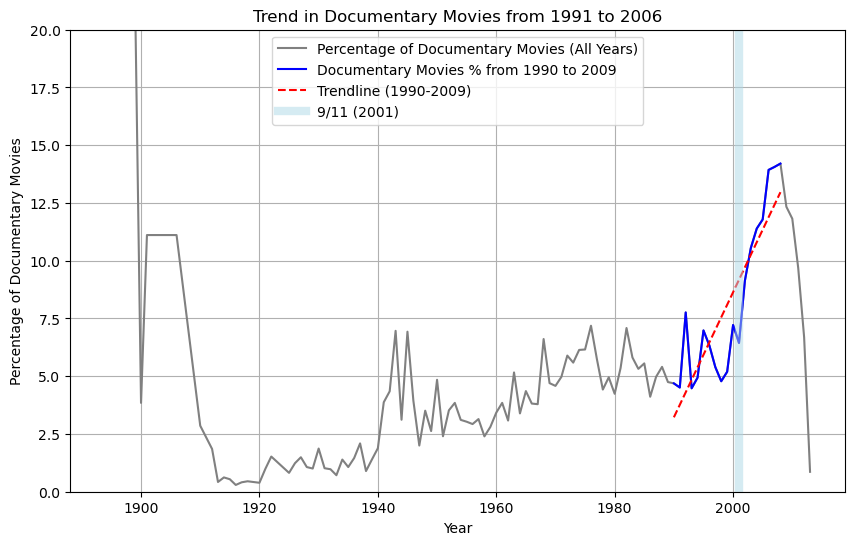

Slope from 1990 to 2009: 0.5414239049840779


In [50]:
documentary_1991_2006_linear(movies_df)

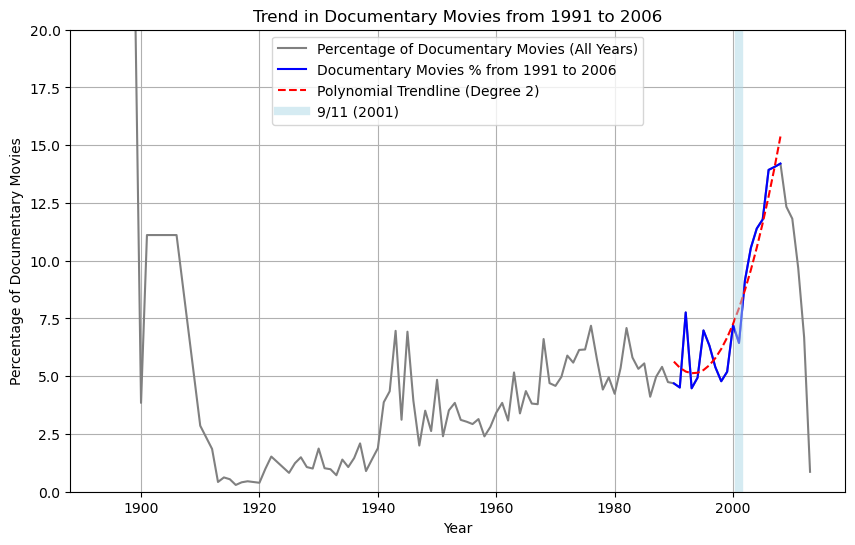

Polynomial Function: f(x) = 187818.534 + -188.447*x^1 + 0.047*x^2


In [51]:
documentary_1991_2006_polynomial(movies_df)

### **Seasonal Patterns in Movies**

### **Sentiment Analysis of Plot Summaries**